In [1]:
from wordcloud import WordCloud
text = open('alice.txt').read()
text[:500]

"Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: En"

In [2]:
wordcloud = WordCloud().generate(text)
wordcloud

In [3]:
wordcloud.words_

{'said': 1.0,
 'Alice': 0.7225433526011561,
 'said Alice': 0.3352601156069364,
 'little': 0.31213872832369943,
 'one': 0.29190751445086704,
 'know': 0.26011560693641617,
 'went': 0.2398843930635838,
 'thing': 0.23121387283236994,
 'time': 0.22254335260115607,
 'Queen': 0.21965317919075145,
 'see': 0.1936416184971098,
 'King': 0.18497109826589594,
 'well': 0.18208092485549132,
 'now': 0.17341040462427745,
 'head': 0.17341040462427745,
 'began': 0.1676300578034682,
 'way': 0.16473988439306358,
 'Hatter': 0.16473988439306358,
 'Mock Turtle': 0.16184971098265896,
 'say': 0.15895953757225434,
 'Gryphon': 0.15895953757225434,
 'think': 0.1531791907514451,
 'quite': 0.15028901734104047,
 'much': 0.14739884393063585,
 'first': 0.14739884393063585,
 'thought': 0.14450867052023122,
 'go': 0.14450867052023122,
 'come': 0.13872832369942195,
 'never': 0.13583815028901733,
 'voice': 0.1329479768786127,
 'looked': 0.13005780346820808,
 'got': 0.13005780346820808,
 'must': 0.12716763005780346,
 'Cat':

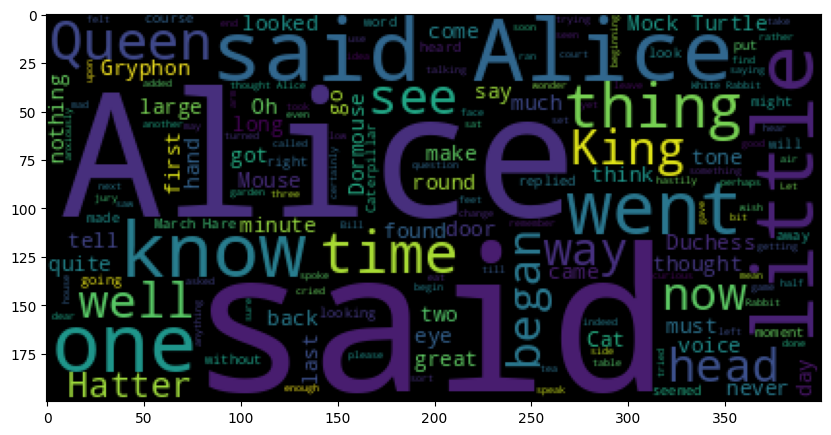

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

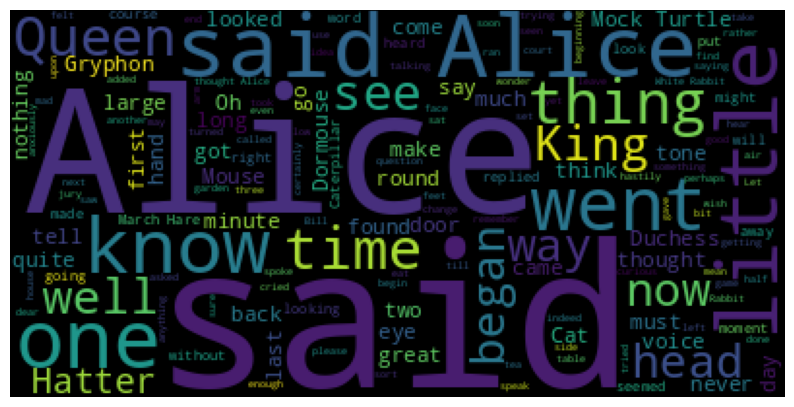

In [5]:
## x축, y축의 ticks를 제거
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

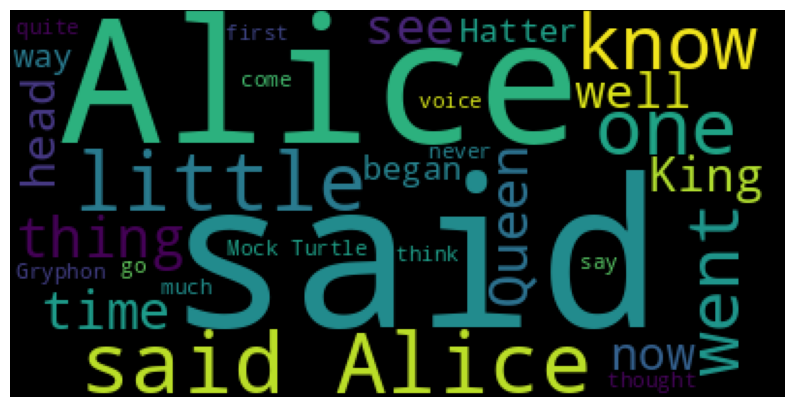

In [6]:
## 최대 글자수를 30개로 제한
wordcloud=WordCloud(max_words=30).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 불용어(STOPWORDS) 적용하기

In [7]:
from wordcloud import STOPWORDS # 불용어
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

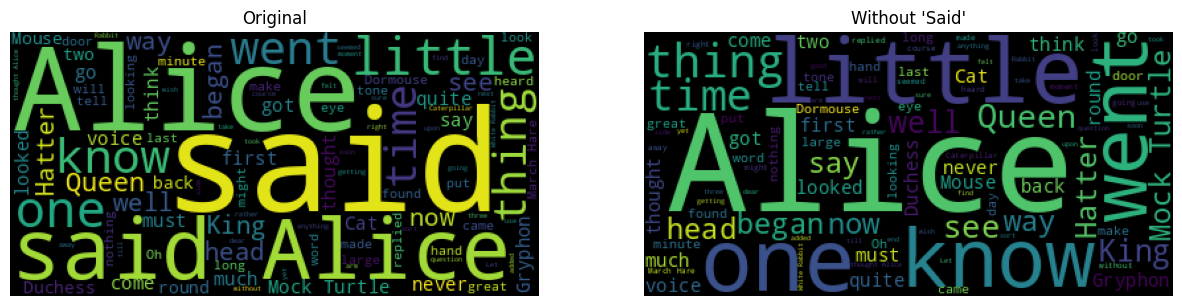

In [8]:
# STOPWORDS에 add 메소드로 불용어를 추가하여 워드 클라우드에서 'said'가 제거된 것을 확인할 수 있다.
a = WordCloud(max_words=100).generate(text)
b = WordCloud(max_words=100,stopwords=STOPWORDS.add('said')).generate(text)

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(a)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(b)
plt.title("Without 'Said'")
plt.axis('off')

plt.show()

## Mask 적용하기

In [10]:
from wordcloud import STOPWORDS # 수정한 stopwords 초기화
from PIL import Image           # "Python Imaging Library", 이미지 처리와 조작을 위한 파이썬 라이브러리
import numpy as np

word_mask = np.array(Image.open('./alice_mask.png'))
word_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

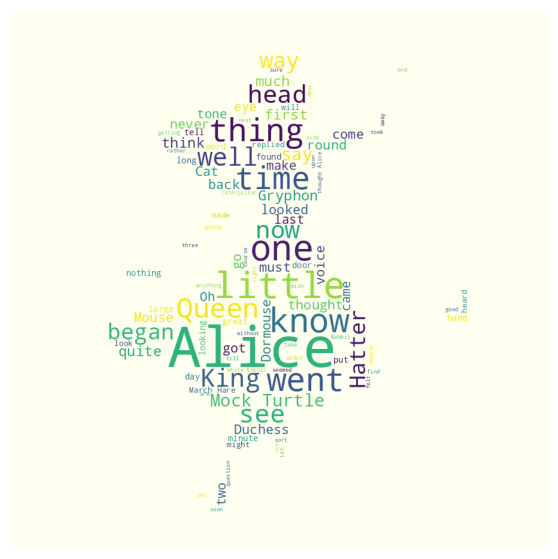

In [11]:
# alice_mask.png의 앨리스 사진 내부에 wordcloud를 채운다
wordcloud = WordCloud(max_words=100, stopwords=STOPWORDS, mask=word_mask, background_color='ivory').generate(text)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()